In [1]:
import numpy as np
import os
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import math
from matplotlib.pyplot import MultipleLocator


In [2]:
def border():
    bwith = 2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    # ax.spines['top'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['right'].set_color('grey')  # 设置右‘脊梁’为无色
    # ax.spines['left'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['bottom'].set_color('none')  # 设置右‘脊梁’为无色
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
ft = 60 # font size
lw = 5 # line width
ms = 25 # marker size
color = ['darkblue','darkgreen','darkorange','darkviolet','darkred']
marker = ["o", "v", "s", "^", "D", "o"]
linestyle = [(0, ()), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4))]
lw = 8

type = ["FedFSL", "FedFSL-BIAS", "Ours"]

bws = [0.1,0.5,1,5,10]

In [3]:
runtime_list = {'agnews': [[148512.0, 7992.0, 662.0],
  [36512.0, 7800.0, 550.0],
  [22512.0, 7776.0, 536.0],
  [11312.0, 7756.799999999997, 524.8],
  [9912.0, 7754.399999999999, 523.4]],
 'mnli': [[472744.0, 4000.0, 714.4000000000002],
  [104744.0, 3776.0, 554.4000000000001],
  [58744.0, 3748.0, 534.4000000000001],
  [21944.0, 3725.600000000001, 518.4],
  [17344.0, 3722.7999999999993, 516.4]],
 'yahoo': [[344024.0, 12332.0, 2087.0],
  [88024.0, 12076.0, 1847.0],
  [56024.0, 12044.0, 1817.0],
  [30424.0, 12018.399999999996, 1793.0000000000005],
  [27224.0, 12015.200000000003, 1790.0000000000005]],
 'yelp-full': [[249072.0, 7618.0, 1308.0],
  [57072.0, 7330.0, 1244.0],
  [33072.0, 7294.0, 1236.0],
  [13872.0, 7265.199999999997, 1229.6],
  [11472.0, 7261.599999999998, 1228.8]]}

[[148512.   36512.   22512.   11312.    9912. ]
 [  7992.    7800.    7776.    7756.8   7754.4]
 [   662.     550.     536.     524.8    523.4]]


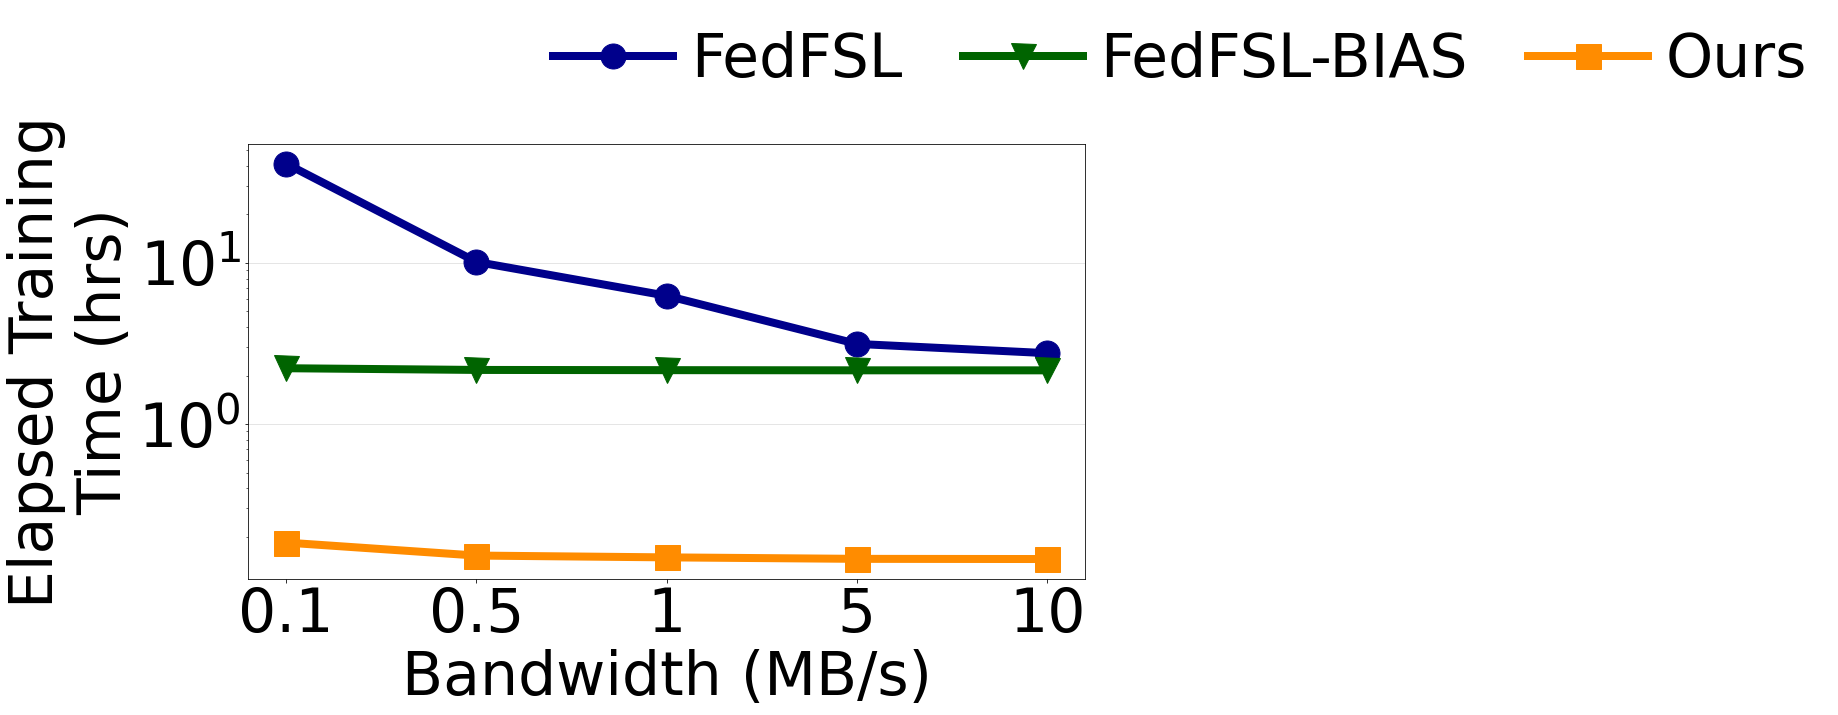

In [8]:
runtime = np.array(runtime_list['agnews']).T
fig = plt.figure(figsize=(15,8))
# 设置刻度字体大小
# plt.title("Text Classification (20news)",fontsize=ft)
# 设置刻度字体大小
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel("Bandwidth (MB/s)", fontsize=ft)
plt.ylabel("Elapsed Training\nTime (hrs)", fontsize=ft)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)

# plt.set_yscale('log')

# x_major_locator=MultipleLocator(0.2)
# y_major_locator=MultipleLocator(1)
ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
ax.set_yscale('log')

for i in range(3):
    # if i == 1 or i == 2 or i == 3:
    #     continue
    # log_runtime = [math.log(i, 10) for i in runtime[i]]
    plt.plot(range(5), np.array(runtime[i])/3600, linewidth = lw, color=color[i], marker=marker[i], markersize = ms, label=type[i])

plt.xticks(range(5), bws)
print(runtime)

plt.legend(fontsize=60,ncol = 5,loc="lower left", bbox_to_anchor=(0.3, 1),frameon=False,columnspacing = 1.0,handletextpad=0.3)
plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/overall/bandwidth/20news.pdf', bbox_inches="tight")

[[472744.  104744.   58744.   21944.   17344. ]
 [  4000.    3776.    3748.    3725.6   3722.8]
 [   714.4    554.4    534.4    518.4    516.4]]


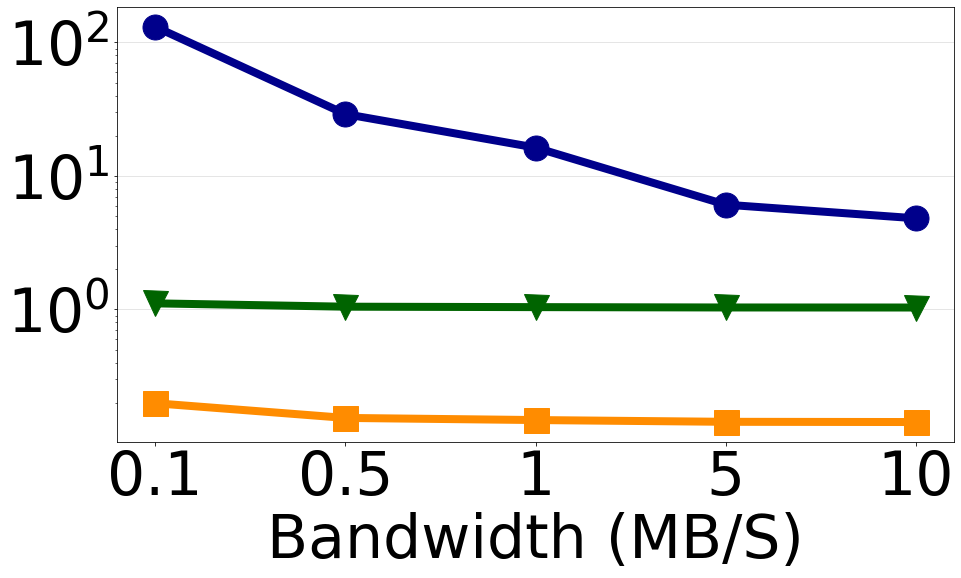

In [7]:
runtime = np.array(runtime_list['mnli']).T
plt.figure(figsize=(15,8))
# 设置刻度字体大小
# plt.title("Text Classification (agnews)",fontsize=ft)
# 设置刻度字体大小
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel("Bandwidth (MB/s)", fontsize=ft)
# plt.ylabel(r"Runtime $(Log~\bullet~h)$", fontsize=ft)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)


# plt.set_yscale('log')

# x_major_locator=MultipleLocator(0.2)
# y_major_locator=MultipleLocator(1)
ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
ax.set_yscale('log')

for i in range(3):
    # if i == 1 or i == 2 or i == 3:
    #     continue
    # log_runtime = [math.log(i, 10) for i in runtime[i]]
    plt.plot(range(5), np.array(runtime[i])/3600, linewidth = lw, color=color[i], marker=marker[i], markersize = ms, label=type[i])

plt.xticks(range(5), bws)
print(runtime)

# plt.legend(fontsize=45,ncol = 1)
plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/overall/bandwidth/mnli.pdf', bbox_inches="tight")